In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from yellowbrick.cluster import SilhouetteVisualizer

# Antes de leer el archivo reemplaze los tabs por "comas" y puse encabezados a las columnas.
voy a sacar la columna H y que estimo que es el tipo de trigo.

In [15]:
data = pd.read_csv("seeds_dataset.txt")
data.head()
actualType = data["H"].copy()
del data["H"]

In [16]:
scaled = scale(data)

Sabiendo que hay 3 tipos de trigo, primero pruebo con 3 clusters.

In [17]:
# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Para definir una métrica de distancia diferente usar el módulo KMeansClusterer
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)

In [18]:
# Para realizar el cálculo, ejecutamos el método fit_predict pasando como parámetro el dataset. Éste método realiza el fit y el predict en el mismo momento.
y_km = km.fit_predict(scaled)

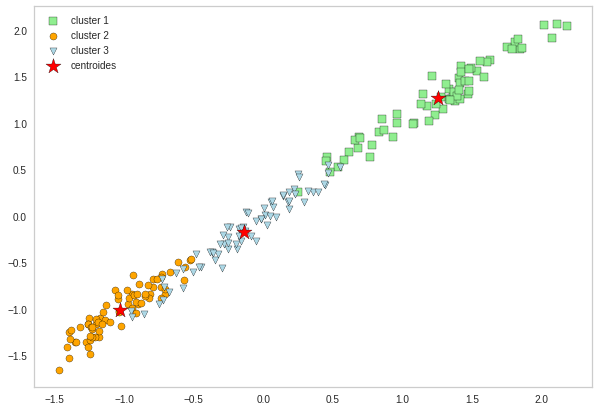

In [19]:
#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    scaled[y_km == 0, 0], scaled[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled[y_km == 1, 0], scaled[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled[y_km == 2, 0], scaled[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

El grafico muestra un buen agrupamiento, donde cada observacion de cada cluster esta cerca de otros de su mismo cluster y el centroide se ve dentro del grupo.
Algunas observaciones se ven mas cerca de unos clusters pero pertenecen a otro, estimo que este "problema" se debe a la diferencia de dimensionalidad, estamos graficando en 2 dimensiones puntos que cuentan con 8 dimensiones, por lo tanto cierta informacion no estamos viendo.

Para encontrar la mejor cantidad de clusters primero uso el metodo de Elbow

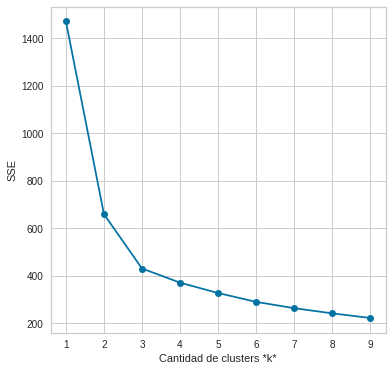

In [20]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

En el grafico se ve que el a partir de 3 clusters la suma de los errores dismnuye lentamente,
 por lo que es probable que K=3 sea la mejor cantidad de clusters. Tener mas clusters reduciria la suma de los errores,
 pero a mayor numero de clusters el error se va reduciendo cada vez menos

Utilizare el indice de silueta para tener mas informacion

In [21]:
list_k = list(range(2, 7))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.46577247686580914
For n_clusters =3 silhouette score is 0.4007270552751299
For n_clusters =4 silhouette score is 0.3291966792017613
For n_clusters =5 silhouette score is 0.2863816249628832
For n_clusters =6 silhouette score is 0.28798447564654184


 Usar 2, 3 y 4 clusters dan el mejor coeficiente.
 En este punto ya elegiria entre 2 y 3 clusters. voy a graficar los 3 para tener una mejor idea

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

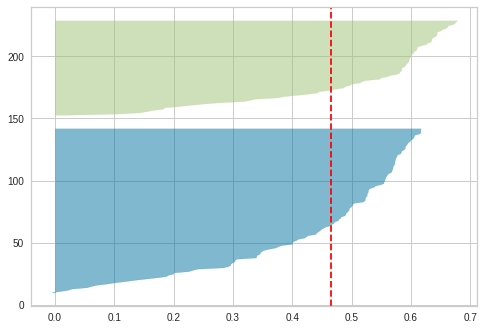

In [22]:
model2 = KMeans(2, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model2, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

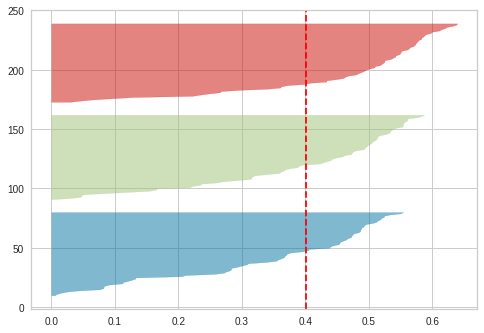

In [23]:
model3 = KMeans(3, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model3, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

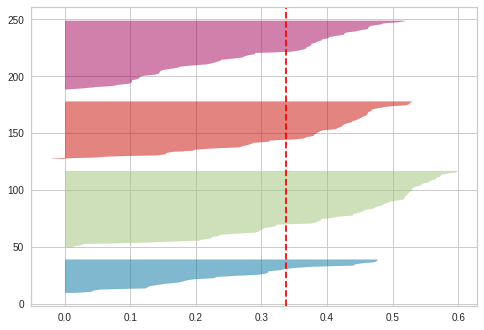

In [24]:
model4 = KMeans(4, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model4, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)

Tanto en la silueta con 2 clusters como con 4 clusters se ve que muy poco registros "mal asignados" al cluster,
mientras q con 3 clusters eso no sucede.

Podriamos continuar analisando 2 focos,  con 3 clusters validar si los " 3 tipos de trigos" tiene las mismas caracteristicas, osea si los grupos creados por el algoritmo reflejan los grupos reales.
O tambien podriamos analisar con 2 cluster cual fue el "tipo de trigo que desaparecio"

trate de juntar los valores predecidos para cada registro del model2.labels_ con la columna del valor actual y armar un grafico de barra que mostrarar por cada cluster cuales eran los tipos de trigo que tenia pero no pude